In [1]:
import pandas as pd
import seaborn as sns
sns.set()
import missingno as msnum

In [2]:
pd.set_option("display.max_columns", 200)
pd.set_option("display.max_row", 160)
pd.set_option('max_colwidth', 200)

In [3]:
rejected = pd.read_csv('../../Data/rejected.csv')

In [4]:
rejected.isnull().sum()

Amount Requested               0
Application Date               0
Loan Title                  1303
Risk_Score              18497630
Debt-To-Income Ratio           0
Zip Code                     293
State                         22
Employment Length         951355
Policy Code                  918
dtype: int64

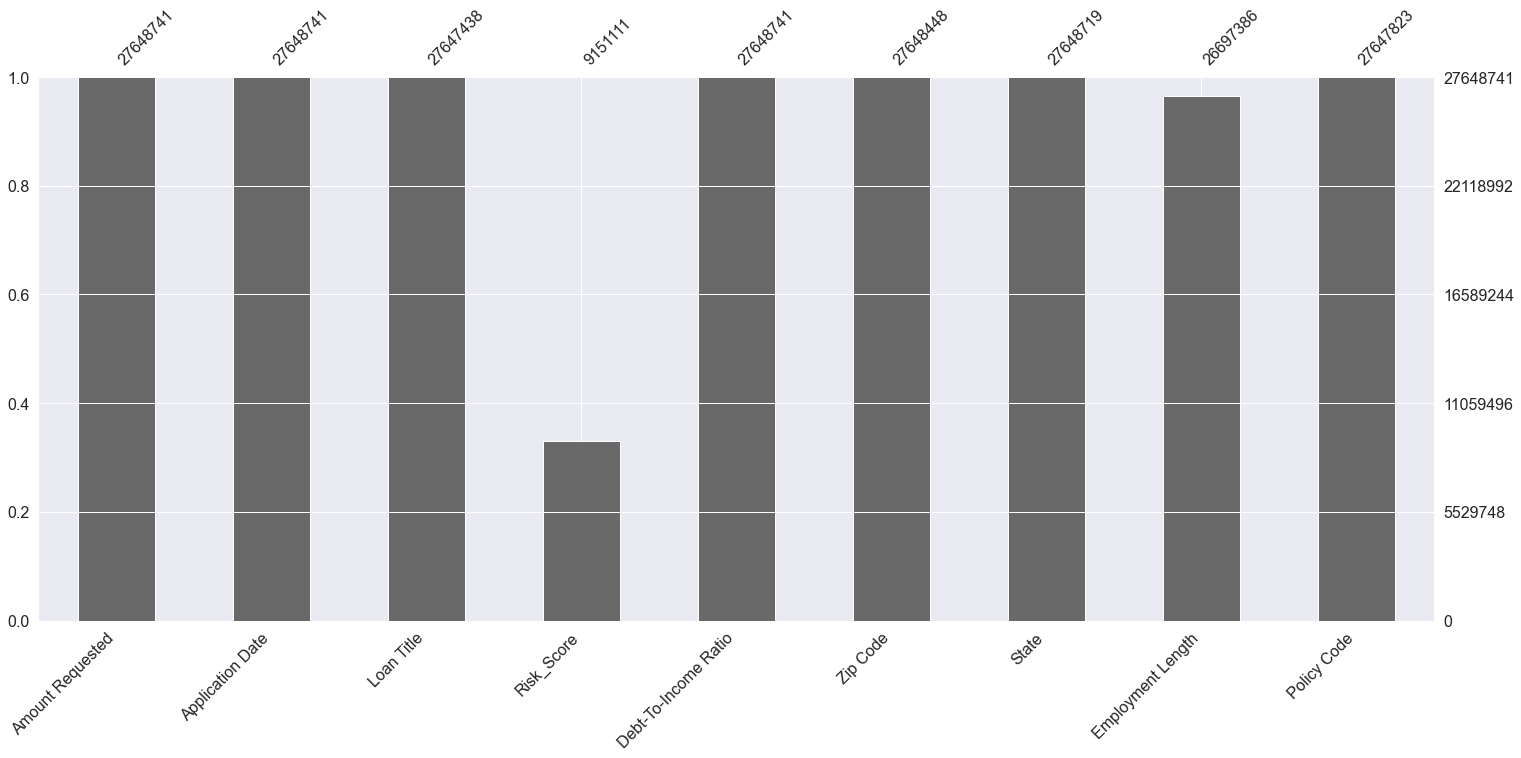

In [5]:
msnum.bar(rejected);

In [6]:
rejected['Policy Code'].value_counts()

0.0    27559694
2.0       88129
Name: Policy Code, dtype: int64

In [7]:
rejected['Application Date'].value_counts()

2018-12-04    42112
2018-09-12    40849
2018-12-05    40394
2018-05-14    40390
2018-12-10    40055
              ...  
2007-08-19        2
2007-06-16        2
2007-07-28        2
2007-05-26        2
2007-06-07        1
Name: Application Date, Length: 4238, dtype: int64

In [8]:
rejected.head(2)

,Amount Requested,Application Date,Loan Title,Risk_Score,Debt-To-Income Ratio,Zip Code,State,Employment Length,Policy Code
0,1000.0,2007-05-26,Wedding Covered but No Honeymoon,693.0,10%,481xx,NM,4 years,0.0
1,1000.0,2007-05-26,Consolidating Debt,703.0,10%,010xx,MA,< 1 year,0.0


In [9]:
# 1. Date should not have impact on application outcome? Not 100% sure, but fair assumption. (Drop)
# 2. Policy Code is determined after review of application. Not a pre-known feature. (Drop)
# 3. Zip Code & State (Geographic Factors) also don't play a role in application outcome. (Drop x 2)
# 4. Application Amount vs Debt To Income.....DTI is more important, but isn't there a 40k ceiling? 
# 5. Risk Score is Crucial. DTI, Amount Requested, Employment Length, Loan Title. (Keep 5, Drop 4)??

In [10]:
drop = rejected[['Application Date', 'Zip Code', 'State', 'Policy Code']]
drop

,Application Date,Zip Code,State,Policy Code
0,2007-05-26,481xx,NM,0.0
1,2007-05-26,010xx,MA,0.0
2,2007-05-27,212xx,MD,0.0
3,2007-05-27,017xx,MA,0.0
4,2007-05-27,209xx,MD,0.0
...,...,...,...,...
27648736,2016-12-31,441xx,OH,0.0
27648737,2016-12-31,207xx,MD,0.0
27648738,2016-12-31,914xx,CA,0.0
27648739,2016-12-31,880xx,NM,0.0


In [11]:
keep = rejected[['Amount Requested', 'Loan Title', 'Risk_Score', 'Debt-To-Income Ratio', 'Employment Length']]
keep

,Amount Requested,Loan Title,Risk_Score,Debt-To-Income Ratio,Employment Length
0,1000.0,Wedding Covered but No Honeymoon,693.0,10%,4 years
1,1000.0,Consolidating Debt,703.0,10%,< 1 year
2,11000.0,Want to consolidate my debt,715.0,10%,1 year
3,6000.0,waksman,698.0,38.64%,< 1 year
4,1500.0,mdrigo,509.0,9.43%,< 1 year
...,...,...,...,...,...
27648736,10000.0,Debt consolidation,590.0,41.26%,< 1 year
27648737,10000.0,moving,NaN,1.48%,5 years
27648738,1200.0,Other,686.0,10.26%,< 1 year
27648739,25000.0,debt_consolidation,NaN,17.71%,< 1 year


In [12]:
keep.isnull().sum()

Amount Requested               0
Loan Title                  1303
Risk_Score              18497630
Debt-To-Income Ratio           0
Employment Length         951355
dtype: int64

In [13]:
r = keep.dropna().reset_index(drop=True)

In [14]:
r

,Amount Requested,Loan Title,Risk_Score,Debt-To-Income Ratio,Employment Length
0,1000.0,Wedding Covered but No Honeymoon,693.0,10%,4 years
1,1000.0,Consolidating Debt,703.0,10%,< 1 year
2,11000.0,Want to consolidate my debt,715.0,10%,1 year
3,6000.0,waksman,698.0,38.64%,< 1 year
4,1500.0,mdrigo,509.0,9.43%,< 1 year
...,...,...,...,...,...
8992580,30000.0,Debt consolidation,681.0,55.15%,< 1 year
8992581,1000.0,Debt consolidation,531.0,31.31%,< 1 year
8992582,10000.0,Debt consolidation,590.0,41.26%,< 1 year
8992583,1200.0,Other,686.0,10.26%,< 1 year


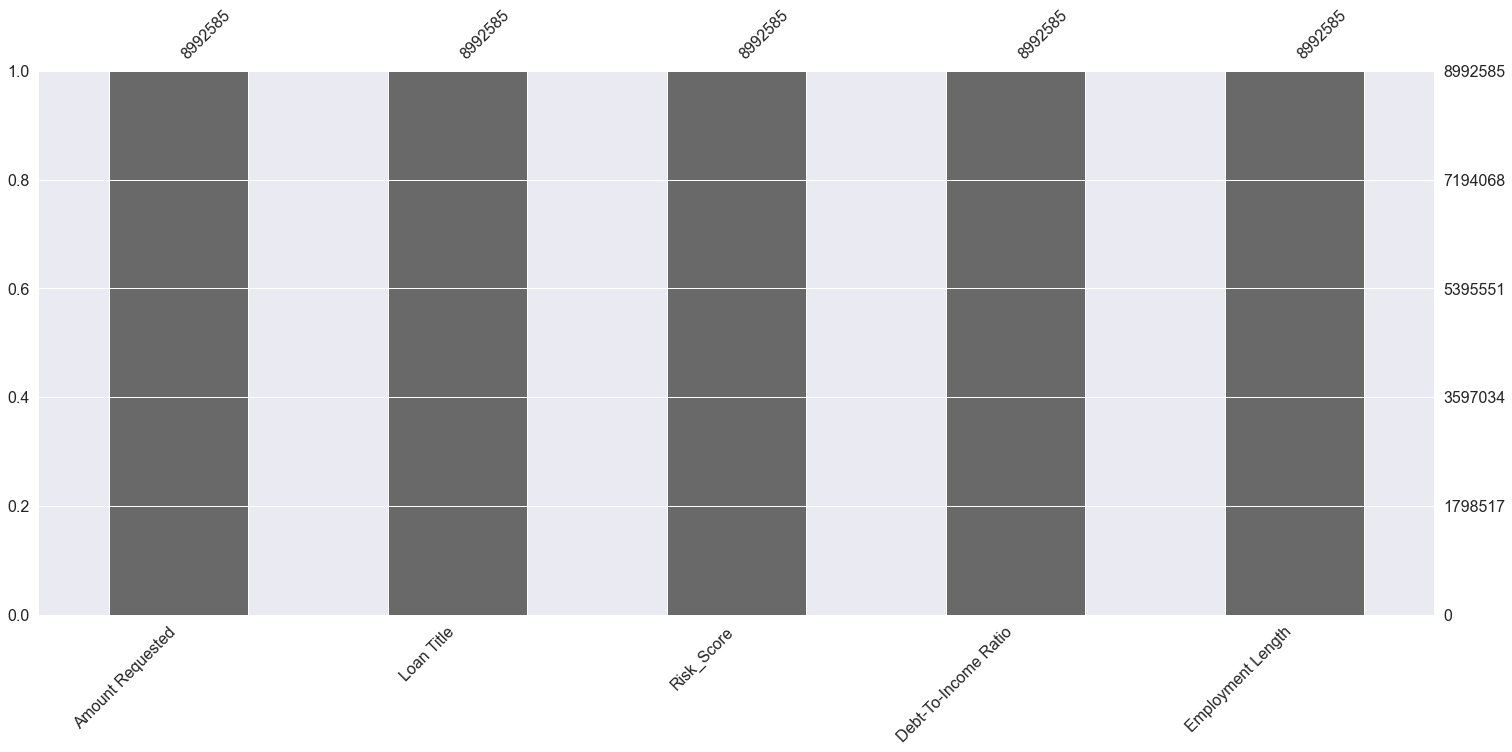

In [15]:
msnum.bar(r);

In [16]:
r.dtypes

Amount Requested        float64
Loan Title               object
Risk_Score              float64
Debt-To-Income Ratio     object
Employment Length        object
dtype: object

In [19]:
r['Loan Title'] = r['Loan Title'].replace({'debt_consolidation':'Debt consolidation',
                                                         'Debt consolidation':'Debt Consolidation',
                                                         'credit_card':'Credit card refinancing',
                                                         'Credit card refinancing':'Credit Card Refinancing',
                                                         'other':'Other',
                                                         'car':'Car financing',
                                                         'Car financing':'Car Financing',
                                                         'home_improvement':'Home improvement',
                                                         'Home improvement':'Home Improvement',
                                                         'major_purchase':'Major purchase',
                                                         'Major purchase':'Major Purchase',
                                                         'moving':'Moving',
                                                         'medical':'Medical expenses',
                                                         'Medical expenses':'Medical Expenses',
                                                         'Home buying':'Home Purchase',
                                                         'small_business':'Business Loan',
                                                         'Business':'Business Loan',
                                                         'Moving':'Moving And relocation',
                                                         'Moving and relocation': 'Moving And Relocation',
                                                         'house':'Home Purchase',
                                                         'vacation':'Vacation',
                                                         'Business Line Of Credit':'Business Loan',
                                                         'debt consolidation':'Debt Consolidation',
                                                         ' ':'Other',
                                                         'renewable_energy':'Green loan',
                                                         'Green loan':'Green Loan',
                                                         'Consolidation':'Debt Consolidation',
                                                         'Debt Consolidation Loan':'Debt Consolidation',
                                                         'personal':'Personal Loan',
                                                         'Personal':'Personal Loan',
                                                         'educational':'Education',
                                                         'wedding':'Wedding',
                                                         'personal loan':'Personal Loan',
                                                         'consolidation':'Debt Consolidation',
                                                         'Education':'Student Loan',
                                                         'Small Business Loan':'Business Loan',
                                                         'home improvement':'Home Improvement',
                                                         'Credit Card Consolidation':'Credit Card Refinancing',
                                                         'Loan':'Other',
                                                         'Consolidate':'Debt Consolidation',
                                                         'Consolidation Loan':'Debt Consolidation',
                                                         'Credit Card Refinance':'Credit Card Refinancing',
                                                         'student loan':'Student Loan',
                                                         'Debt':'Other',
                                                         'consolidate':'Debt Consolidation',
                                                         'Credit Card Loan':'Credit Card Refinancing',
                                                         'loan':'Other',
                                                         'Car Loan':'Car Financing',
                                                         'Credit Card Payoff':'Credit Card Refinancing',
                                                         'Personal loan':'Personal Loan',
                                                         'School':'Student Loan', 
                                                         'debt':'Other',
                                                         'business':'Business Loan',
                                                         'Home Improvement Loan':'Home Improvement', 
                                                         'School Loan':'Student Loan',
                                                         'credit card refinance':'Credit Card Refinancing',
                                                         'payoff':'Other',
                                                         'My Loan':'Personal Loan',
                                                         'my loan':'Personal Loan',
                                                         'Credit Card':'Credit Card Refinancing',
                                                         'credit card':'Credit Card Refinancing',
                                                         'credit cards':'Credit Card Refinancing',
                                                         'credit card payoff':'Credit Card Refinancing',
                                                         'DEBT CONSOLIDATION':'Debt Consolidation',
                                                         'Medical':'Medical Expenses',
                                                         'home':'Home Improvement',
                                                         'Credit Cards':'Credit Card Refinancing',
                                                         'school':'Student Loan',
                                                         'Credit Card Financing':'Credit Card Refinancing',
                                                         'credit card consolidation':'Credit Card Refinancing',
                                                         'consolidation loan':'Debt Consolidation',
                                                         'pay off credit cards':'Credit Card Refinancing',
                                                         'business loan': 'Business Loan', 
                                                         'Payoff':'Other',
                                                         'debt consolidation loan':'Debt Consolidation',
                                                         'Debt Consolidation ':'Debt Consolidation',
                                                         'bills':'Other',
                                                         'Home':'Home Improvement',
                                                         'Small Business':'Business Loan',
                                                         'Consolidate debt':'Debt Consolidation',
                                                         'Consolidate Debt':'Debt Consolidation',
                                                         'Refinance':'Other',
                                                         'Bills':'Other',
                                                         'freedom':'Freedom',
                                                         'school loan':'Student Loan',
                                                         'Wedding Loan':'Wedding',
                                                         'Debt Free':'Other',
                                                         'car loan':'Car Financing',
                                                         'Other Loan':'Other',
                                                         'Debt Loan':'Other',
                                                         'Debt consolidation loan':'Debt Consolidation',
                                                         'Education Loan':'Student Loan',
                                                         'education':'Student Loan',
                                                         'Major Purchase Loan':'Major Purchase',
                                                         'Credit card consolidation':'Credit Card Refinancing',
                                                         'Pay off credit cards':'Credit Card Refinancing',
                                                         'Car':'Car Financing',
                                                         'Auto Loan':'Car Financing',
                                                         'Credit Card Debt':'Credit Card Refinancing',
                                                         'major purchase':'Major Purchase',
                                                         'Motorcycle':'Motorcycle Loan',
                                                         'Debt consolidation':'Debt Consolidation',
                                                         'consolidate debt':'Debt Consolidation',
                                                         'Student Loan ':'Student Loan',
                                                         'Student loan':'Student Loan',
                                                         'My loan':'Personal Loan'})

In [20]:
r['Loan Title'].value_counts(dropna=False).nlargest(20)

Debt Consolidation         4159374
Other                      1392423
Credit Card Refinancing    1126160
Car Financing               466332
Home Improvement            407364
Medical Expenses            274278
Major Purchase              258238
Business Loan               233881
Home Purchase               169945
Moving And Relocation       127095
Moving And relocation       126704
Vacation                    100715
Green Loan                   23707
Wedding                      17965
Personal Loan                 5206
Student Loan                  4498
Freedom                        411
Motorcycle Loan                262
Debt consolidation             140
Credit Consolidation           133
Name: Loan Title, dtype: int64

In [21]:
#r['Policy Code'].value_counts()

In [22]:
pd.read_excel('../../Data/LCDataDictionary.xlsx')

,LoanStatNew,Description
0,acc_now_delinq,The number of accounts on which the borrower is now delinquent.
1,acc_open_past_24mths,Number of trades opened in past 24 months.
2,addr_state,The state provided by the borrower in the loan application
3,all_util,Balance to credit limit on all trades
4,annual_inc,The self-reported annual income provided by the borrower during registration.
5,annual_inc_joint,The combined self-reported annual income provided by the co-borrowers during registration
6,application_type,Indicates whether the loan is an individual application or a joint application with two co-borrowers
7,avg_cur_bal,Average current balance of all accounts
8,bc_open_to_buy,Total open to buy on revolving bankcards.
9,bc_util,Ratio of total current balance to high credit/credit limit for all bankcard accounts.


In [23]:
r = r.rename(columns={"Debt-To-Income Ratio":"DI"})

In [24]:
r

,Amount Requested,Loan Title,Risk_Score,DI,Employment Length
0,1000.0,Wedding Covered but No Honeymoon,693.0,10%,4 years
1,1000.0,Consolidating Debt,703.0,10%,< 1 year
2,11000.0,Want to consolidate my debt,715.0,10%,1 year
3,6000.0,waksman,698.0,38.64%,< 1 year
4,1500.0,mdrigo,509.0,9.43%,< 1 year
...,...,...,...,...,...
8992580,30000.0,Debt Consolidation,681.0,55.15%,< 1 year
8992581,1000.0,Debt Consolidation,531.0,31.31%,< 1 year
8992582,10000.0,Debt Consolidation,590.0,41.26%,< 1 year
8992583,1200.0,Other,686.0,10.26%,< 1 year


In [25]:
r['DI'] = r['DI'].str.rstrip("%").astype(float)/100

In [26]:
r

,Amount Requested,Loan Title,Risk_Score,DI,Employment Length
0,1000.0,Wedding Covered but No Honeymoon,693.0,0.1000,4 years
1,1000.0,Consolidating Debt,703.0,0.1000,< 1 year
2,11000.0,Want to consolidate my debt,715.0,0.1000,1 year
3,6000.0,waksman,698.0,0.3864,< 1 year
4,1500.0,mdrigo,509.0,0.0943,< 1 year
...,...,...,...,...,...
8992580,30000.0,Debt Consolidation,681.0,0.5515,< 1 year
8992581,1000.0,Debt Consolidation,531.0,0.3131,< 1 year
8992582,10000.0,Debt Consolidation,590.0,0.4126,< 1 year
8992583,1200.0,Other,686.0,0.1026,< 1 year


In [27]:
r = r.assign(Accepted = 0)
r

,Amount Requested,Loan Title,Risk_Score,DI,Employment Length,Accepted
0,1000.0,Wedding Covered but No Honeymoon,693.0,0.1000,4 years,0
1,1000.0,Consolidating Debt,703.0,0.1000,< 1 year,0
2,11000.0,Want to consolidate my debt,715.0,0.1000,1 year,0
3,6000.0,waksman,698.0,0.3864,< 1 year,0
4,1500.0,mdrigo,509.0,0.0943,< 1 year,0
...,...,...,...,...,...,...
8992580,30000.0,Debt Consolidation,681.0,0.5515,< 1 year,0
8992581,1000.0,Debt Consolidation,531.0,0.3131,< 1 year,0
8992582,10000.0,Debt Consolidation,590.0,0.4126,< 1 year,0
8992583,1200.0,Other,686.0,0.1026,< 1 year,0


In [28]:
r.dtypes

Amount Requested     float64
Loan Title            object
Risk_Score           float64
DI                   float64
Employment Length     object
Accepted               int64
dtype: object

In [29]:
r.describe()

,Amount Requested,Risk_Score,DI,Accepted
count,8.992585e+06,8.992585e+06,8.992585e+06,8992585.0
mean,1.263466e+04,6.273527e+02,1.695683e+00,0.0
std,1.090296e+04,8.993240e+01,1.776785e+02,0.0
min,1.500000e+02,0.000000e+00,-1.000000e-02,0.0
25%,4.000000e+03,5.910000e+02,9.060000e-02,0.0
50%,1.000000e+04,6.360000e+02,2.055000e-01,0.0
75%,2.000000e+04,6.740000e+02,3.626000e-01,0.0
max,1.400000e+06,9.900000e+02,5.000003e+05,0.0


In [30]:
accepted = pd.read_csv('../../Data/accepted.csv')

/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3444: DtypeWarning: Columns (0,19,49,59,118,129,130,131,134,135,136,139,145,146,147) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [31]:
accepted

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,fico_range_low,fico_range_high,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,last_fico_range_high,last_fico_range_low,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_act_il,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,revol_bal_joint,sec_app_fico_range_low,sec_app_fico_range_high,sec_app_earliest_cr_line,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_act_il,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,sec_app_mths_since_last_major_derog,hardship_flag,hardship_type,hardship_reason,hardship_status,deferral_term,hardship_amount,hardship_start_date,hardship_end_date,payment_plan_start_date,hardship_length,hardship_dpd,hardship_loan_status,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,disbursement_method,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
0,68407277,NaN,3600.0,3600.0,3600.0,36 months,13.99,123.03,C,C4,leadman,10+ years,MORTGAGE,55000.0,Not Verified,Dec-2015,Fully Paid,n,https://lendingclub.com/browse/loanDetail.action?loan_id=68407277,NaN,debt_consolidation,Debt consolidation,190xx,PA,5.91,0.0,Aug-2003,675.0,679.0,1.0,30.0,NaN,7.0,0.0,2765.0,29.7,13.0,w,0.00,0.00,4421.723917,4421.72,3600.00,821.72,0.00,0.0,0.0,Jan-2019,122.67,NaN,Mar-2019,564.0,560.0,0.0,30.0,1.0,Individual,NaN,NaN,NaN,0.0,722.0,144904.0,2.0,2.0,0.0,1.0,21.0,4981.0,36.0,3.0,3.0,722.0,34.0,9300.0,3.0,1.0,4.0,4.0,20701.0,1506.0,37.2,0.0,0.0,148.0,128.0,3.0,3.0,1.0,4.0,69.0,4.0,69.0,2.0,2.0,4.0,2.0,5.0,3.0,4.0,9.0,4.0,7.0,0.0,0.0,0.0,3.0,76.9,0.0,0.0,0.0,178050.0,7746.0,2400.0,13734.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
1,68355089,NaN,24700.0,24700.0,24700.0,36 months,11.99,820.28,C,C1,Engineer,10+ years,MORTGAGE,65000.0,Not Verified,Dec-2015,Fully Paid,n,https://lendingclub.com/browse/loanDetail.action?loan_id=68355089,NaN,small_business,Business,577xx,SD,16.06,1.0,Dec-1999,715.0,719.0,4.0,6.0,NaN,22.0,0.0,21470.0,19.2,38.0,w,0.00,0.00,25679.660000,25679.66,24700.00,979.66,0.00,0.0,0.0,Jun-2016,926.35,NaN,Mar-2019,699.0,695.0,0.0,NaN,1.0,Individual,NaN,NaN,NaN,0.0,0.0,204396.0,1.0,1.0,0.0,1.0,19.0,18005.0,73.0,2.0,3.0,6472.0,29.0,111800.0,0.0,0.0,6.0,4.0,9733.0,57830.0,27.1,0.0,0.0,113.0,192.0,2.0,2.0,4.0,2.0,NaN,0.0,6.0,0.0,5.0,5.0,13.0,17.0,6.0,20.0,27.0,5.0,22.0,0.0,0.0,0.0,2.0,97.4,7.7,0.0,0.0,314017.0,39475.0,793

In [32]:
a = accepted[['loan_amnt', 'purpose', 'fico_range_low', 
          'fico_range_high', 'annual_inc', 'emp_length']]

In [33]:
a.shape

(2260701, 6)

In [34]:
a.isnull().sum()

loan_amnt              33
purpose                33
fico_range_low         33
fico_range_high        33
annual_inc             37
emp_length         146940
dtype: int64

In [35]:
a['purpose'] = a['purpose'].replace({'debt_consolidation':'Debt Consolidation',
                                                   'credit_card':'Credit Card Refinancing',
                                                   'home_improvement':'Home Improvement',
                                                   'other':'Other',
                                                   'major_purchase':'Major Purchase',
                                                   'medical':'Medical Expenses',
                                                   'small_business':'Business Loan',
                                                   'car':'Car Financing',
                                                   'vacation':'Vacation',
                                                   'moving':'Moving And Relocation',
                                                   'house':'Home Purchase',
                                                   'wedding':'Wedding',
                                                   'renewable_energy':'Green Loan',
                                                   'educational':'Student Loan'})

/var/folders/kl/4xt5tydd0xb8yvwkgnx2mnc00000gn/T/ipykernel_4843/2300362833.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  a['purpose'] = a['purpose'].replace({'debt_consolidation':'Debt Consolidation',


In [36]:
a['purpose'].value_counts(dropna=False)

Debt Consolidation         1277877
Credit Card Refinancing     516971
Home Improvement            150457
Other                       139440
Major Purchase               50445
Medical Expenses             27488
Business Loan                24689
Car Financing                24013
Vacation                     15525
Moving And Relocation        15403
Home Purchase                14136
Wedding                       2355
Green Loan                    1445
Student Loan                   424
NaN                             33
Name: purpose, dtype: int64

In [37]:
a[a.annual_inc == 0] 

,loan_amnt,purpose,fico_range_low,fico_range_high,annual_inc,emp_length
18202,20000.0,Debt Consolidation,685.0,689.0,0.0,NaN
65620,3700.0,Credit Card Refinancing,680.0,684.0,0.0,NaN
421705,40000.0,Home Improvement,695.0,699.0,0.0,NaN
422321,40000.0,Debt Consolidation,755.0,759.0,0.0,NaN
422379,3000.0,Other,790.0,794.0,0.0,2 years
...,...,...,...,...,...,...
2228436,8750.0,Debt Consolidation,715.0,719.0,0.0,NaN
2228456,18000.0,Debt Consolidation,680.0,684.0,0.0,< 1 year
2230378,10000.0,Credit Card Refinancing,705.0,709.0,0.0,NaN
2232830,23950.0,Debt Consolidation,670.0,674.0,0.0,NaN


In [38]:
a = a.drop(a[a.annual_inc == 0].index)

In [39]:
a = a.assign(FICO = (a['fico_range_low'] + a['fico_range_high'])/2)

In [40]:
a = a.assign(Accepted = 1)

In [41]:
a.shape

(2259034, 8)

In [42]:
a = a.rename(columns={"FICO":"Risk_Score"})

In [43]:
a = a.rename(columns={'purpose':"Loan Title"})

In [44]:
a = a.rename(columns={'loan_amnt':'Amount Requested'})

In [45]:
a = a.rename(columns={'issue_d':'Application Date'})

In [46]:
a = a.assign(DI = (a['Amount Requested'] / a['annual_inc']))

In [47]:
a = a[['Amount Requested','Loan Title','Risk_Score', 'DI', 'emp_length', 'Accepted']]

In [48]:
a = a.rename(columns={"emp_length":"Employment Length"})

In [49]:
a

,Amount Requested,Loan Title,Risk_Score,DI,Employment Length,Accepted
0,3600.0,Debt Consolidation,677.0,0.065455,10+ years,1
1,24700.0,Business Loan,717.0,0.380000,10+ years,1
2,20000.0,Home Improvement,697.0,0.317460,10+ years,1
3,35000.0,Debt Consolidation,787.0,0.318182,10+ years,1
4,10400.0,Major Purchase,697.0,0.099585,3 years,1
...,...,...,...,...,...,...
2260696,40000.0,Debt Consolidation,707.0,0.176211,9 years,1
2260697,24000.0,Debt Consolidation,662.0,0.218182,6 years,1
2260698,14000.0,Debt Consolidation,662.0,0.147368,10+ years,1
2260699,NaN,NaN,NaN,NaN,NaN,1


In [50]:
a.isna().sum()

Amount Requested         33
Loan Title               33
Risk_Score               33
DI                       37
Employment Length    145373
Accepted                  0
dtype: int64

In [51]:
#a['Employment Length'] = a['Employment Length'].replace(np.nan, 'None')

In [52]:
#a

In [53]:
a.shape

(2259034, 6)

In [54]:
a.isna().sum()

Amount Requested         33
Loan Title               33
Risk_Score               33
DI                       37
Employment Length    145373
Accepted                  0
dtype: int64

In [55]:
a = a.dropna()

In [56]:
a.isna().sum()

Amount Requested     0
Loan Title           0
Risk_Score           0
DI                   0
Employment Length    0
Accepted             0
dtype: int64

In [57]:
a.describe()

,Amount Requested,Risk_Score,DI,Accepted
count,2.113657e+06,2.113657e+06,2.113657e+06,2113657.0
mean,1.525026e+04,7.004050e+02,3.339840e-01,1.0
std,9.221131e+03,3.272035e+01,5.329401e+01,0.0
min,5.000000e+02,6.120000e+02,1.612903e-04,1.0
25%,8.000000e+03,6.770000e+02,1.243902e-01,1.0
50%,1.310000e+04,6.920000e+02,2.000000e-01,1.0
75%,2.000000e+04,7.170000e+02,2.926829e-01,1.0
max,4.000000e+04,8.475000e+02,4.000000e+04,1.0


In [58]:
a.shape

(2113657, 6)

In [59]:
#a['Application Date'].value_counts()

In [60]:
r.head(2)

,Amount Requested,Loan Title,Risk_Score,DI,Employment Length,Accepted
0,1000.0,Wedding Covered but No Honeymoon,693.0,0.1,4 years,0
1,1000.0,Consolidating Debt,703.0,0.1,< 1 year,0


In [61]:
a.head(2)

,Amount Requested,Loan Title,Risk_Score,DI,Employment Length,Accepted
0,3600.0,Debt Consolidation,677.0,0.065455,10+ years,1
1,24700.0,Business Loan,717.0,0.380000,10+ years,1


In [62]:
combo = pd.concat([a,r]).reset_index(drop=True)
combo

,Amount Requested,Loan Title,Risk_Score,DI,Employment Length,Accepted
0,3600.0,Debt Consolidation,677.0,0.065455,10+ years,1
1,24700.0,Business Loan,717.0,0.380000,10+ years,1
2,20000.0,Home Improvement,697.0,0.317460,10+ years,1
3,35000.0,Debt Consolidation,787.0,0.318182,10+ years,1
4,10400.0,Major Purchase,697.0,0.099585,3 years,1
...,...,...,...,...,...,...
11106237,30000.0,Debt Consolidation,681.0,0.551500,< 1 year,0
11106238,1000.0,Debt Consolidation,531.0,0.313100,< 1 year,0
11106239,10000.0,Debt Consolidation,590.0,0.412600,< 1 year,0
11106240,1200.0,Other,686.0,0.102600,< 1 year,0


In [63]:
combo.describe()

,Amount Requested,Risk_Score,DI,Accepted
count,1.110624e+07,1.110624e+07,1.110624e+07,1.110624e+07
mean,1.313244e+04,6.412554e+02,1.436534e+00,1.903125e-01
std,1.065306e+04,8.703284e+01,1.615623e+02,3.925477e-01
min,1.500000e+02,0.000000e+00,-1.000000e-02,0.000000e+00
25%,5.000000e+03,6.040000e+02,9.990000e-02,0.000000e+00
50%,1.000000e+04,6.530000e+02,2.031000e-01,0.000000e+00
75%,2.000000e+04,6.870000e+02,3.456000e-01,0.000000e+00
max,1.400000e+06,9.900000e+02,5.000003e+05,1.000000e+00


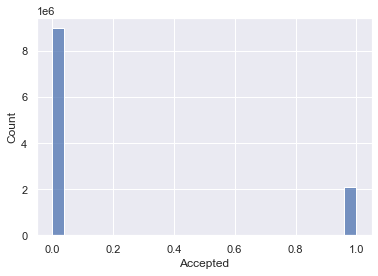

In [64]:
sns.histplot(data=combo, x='Accepted');

In [70]:
combo['Loan Title'].value_counts(dropna=False).nlargest(20)

Debt Consolidation         5357758
Credit Card Refinancing    1610148
Other                      1520820
Home Improvement            545830
Car Financing               488784
Major Purchase              305559
Medical Expenses            299141
Business Loan               257859
Home Purchase               183072
Moving And Relocation       141443
Moving And relocation       126704
Vacation                    114961
Green Loan                   25056
Wedding                      20288
Personal Loan                 5206
Student Loan                  4913
Freedom                        411
Motorcycle Loan                262
Debt consolidation             140
Credit Consolidation           133
Name: Loan Title, dtype: int64

In [71]:
few = combo.groupby('Accepted', group_keys=False).apply(lambda x: x.sample(frac=0.001))

In [72]:
few.describe()

,Amount Requested,Risk_Score,DI,Accepted
count,11107.000000,11107.000000,11107.000000,11107.000000
mean,13310.261277,641.539660,1.849085,0.190330
std,10701.867988,86.449432,95.857589,0.392579
min,400.000000,0.000000,-0.010000,0.000000
25%,5000.000000,604.000000,0.098950,0.000000
50%,10000.000000,653.000000,0.204800,0.000000
75%,20000.000000,687.000000,0.350000,0.000000
max,47175.000000,914.000000,9900.960000,1.000000


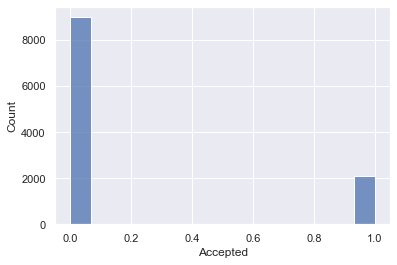

In [73]:
sns.histplot(data=few, x='Accepted');

In [74]:
few.isna().sum()

Amount Requested     0
Loan Title           0
Risk_Score           0
DI                   0
Employment Length    0
Accepted             0
dtype: int64

In [75]:
from pycaret.classification import *

In [76]:
experiment = setup(data = few, target = 'Accepted', categorical_features = ['Employment Length', 'Loan Title'])

,Description,Value
0,session_id,316
1,Target,Accepted
2,Target Type,Binary
3,Label Encoded,None
4,Original Data,"(11107, 6)"
5,Missing Values,False
6,Numeric Features,3
7,Categorical Features,2
8,Ordinal Features,False
9,High Cardinality Features,False


In [77]:
best_model = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lightgbm,Light Gradient Boosting Machine,0.9659,0.9921,0.9118,0.9079,0.9098,0.8888,0.8888,0.0900
catboost,CatBoost Classifier,0.9605,0.9905,0.9022,0.8894,0.8957,0.8714,0.8714,0.5180
ada,Ada Boost Classifier,0.9482,0.9798,0.8865,0.8458,0.8655,0.8335,0.8339,0.0940
gbc,Gradient Boosting Classifier,0.9473,0.9809,0.8995,0.8338,0.8652,0.8325,0.8336,0.2500
rf,Random Forest Classifier,0.9444,0.9731,0.8763,0.8365,0.8557,0.8213,0.8218,0.1260
et,Extra Trees Classifier,0.9299,0.9633,0.8359,0.8008,0.8176,0.7742,0.7748,0.1350
dt,Decision Tree Classifier,0.9286,0.8883,0.8236,0.8031,0.8128,0.7688,0.7691,0.0210
ridge,Ridge Classifier,0.9231,0.0000,0.8400,0.7721,0.8044,0.7566,0.7579,0.0220
lda,Linear Discriminant Analysis,0.9164,0.9505,0.8455,0.7453,0.7920,0.7400,0.7425,0.0650
lr,Logistic Regression,0.8973,0.9216,0.7449,0.7182,0.7293,0.6661,0.6678,0.3500


In [78]:
print(best_model)

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=316, reg_alpha=0.0, reg_lambda=0.0, silent=True,
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)


In [79]:
models()

,Name,Reference,Turbo
ID,,,
lr,Logistic Regression,sklearn.linear_model._logistic.LogisticRegression,True
knn,K Neighbors Classifier,sklearn.neighbors._classification.KNeighborsClassifier,True
nb,Naive Bayes,sklearn.naive_bayes.GaussianNB,True
dt,Decision Tree Classifier,sklearn.tree._classes.DecisionTreeClassifier,True
svm,SVM - Linear Kernel,sklearn.linear_model._stochastic_gradient.SGDClassifier,True
rbfsvm,SVM - Radial Kernel,sklearn.svm._classes.SVC,False
gpc,Gaussian Process Classifier,sklearn.gaussian_process._gpc.GaussianProcessClassifier,False
mlp,MLP Classifier,sklearn.neural_network._multilayer_perceptron.MLPClassifier,False
ridge,Ridge Classifier,sklearn.linear_model._ridge.RidgeClassifier,True


In [80]:
lgbm = create_model('lightgbm')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9589,0.9921,0.8904,0.8904,0.8904,0.8651,0.8651
1,0.9807,0.9946,0.9388,0.9583,0.9485,0.9366,0.9367
2,0.9640,0.9939,0.9184,0.8940,0.9060,0.8838,0.8839
3,0.9499,0.9887,0.8844,0.8553,0.8696,0.8385,0.8387
4,0.9781,0.9955,0.9384,0.9448,0.9416,0.9281,0.9281
5,0.9678,0.9957,0.9110,0.9172,0.9141,0.8943,0.8943
6,0.9614,0.9883,0.9041,0.8919,0.8980,0.8742,0.8742
7,0.9601,0.9908,0.8973,0.8912,0.8942,0.8696,0.8696
8,0.9717,0.9913,0.9178,0.9306,0.9241,0.9067,0.9068


In [81]:
print(lgbm)

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=316, reg_alpha=0.0, reg_lambda=0.0, silent=True,
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)


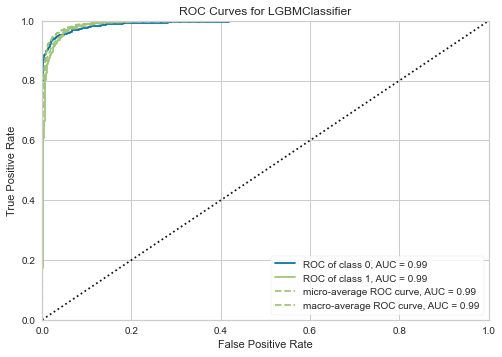

In [82]:
plot_model(lgbm, plot='auc')

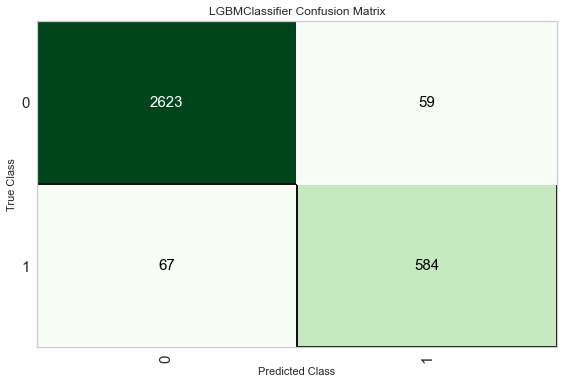

In [83]:
plot_model(lgbm, plot='confusion_matrix')

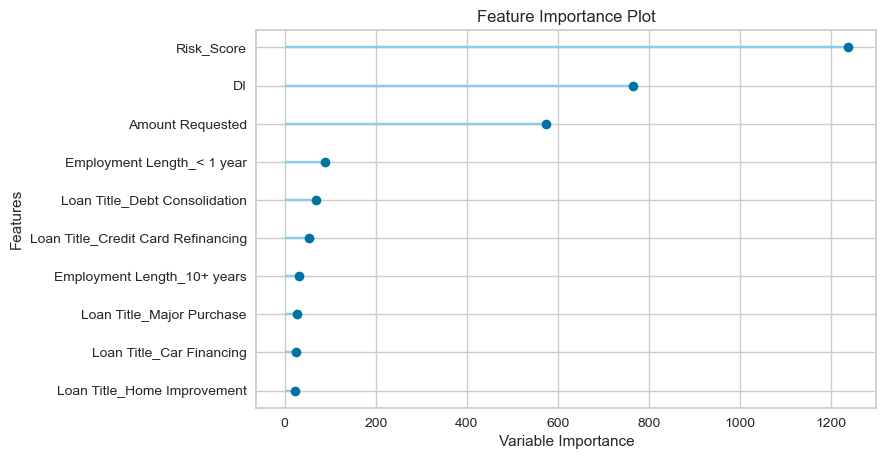

In [84]:
plot_model(lgbm, plot='feature')

In [85]:
cb = create_model('catboost')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9537,0.9897,0.8767,0.8767,0.8767,0.8482,0.8482
1,0.9704,0.9926,0.9320,0.9133,0.9226,0.9043,0.9044
2,0.9627,0.9928,0.9184,0.8882,0.9030,0.8799,0.8801
3,0.9524,0.9889,0.8776,0.8716,0.8746,0.8452,0.8452
4,0.9743,0.9944,0.9384,0.9257,0.9320,0.9161,0.9161
5,0.9665,0.9931,0.9247,0.9000,0.9122,0.8915,0.8916
6,0.9524,0.9861,0.8630,0.8811,0.8720,0.8427,0.8428
7,0.9537,0.9871,0.8836,0.8716,0.8776,0.8490,0.8490
8,0.9614,0.9903,0.9110,0.8867,0.8986,0.8748,0.8749


In [86]:
print(cb)

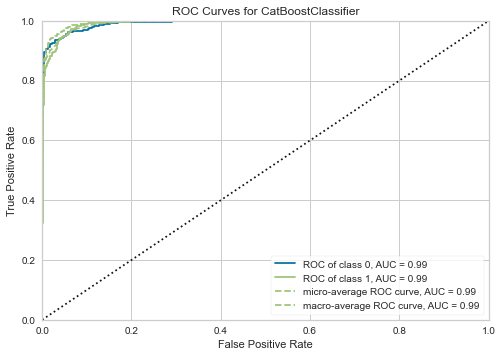

In [87]:
plot_model(cb, plot='auc')

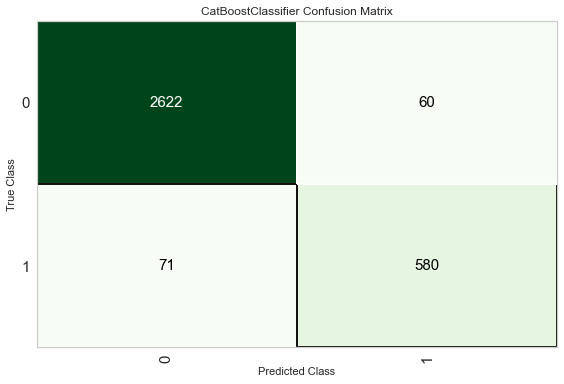

In [88]:
plot_model(cb, plot='confusion_matrix')

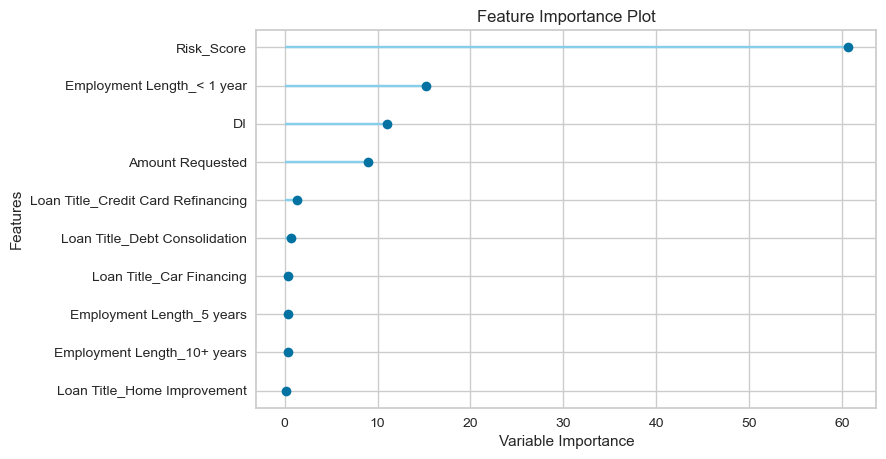

In [89]:
plot_model(cb, plot='feature')

In [ ]:
##Policy Code is internal way of assigning reject/accept/danger (0, 1, 2). 
##It's not available at time of application. 

In [ ]:
#State and Zip Code have no importance. 

In [ ]:
#Really not sure what "Application Date_is_month_start_1". It might just be the category 
#assigned to all Dates (all dates have a first month), and thereby not providing much informational value. 